In [2]:
import pandas as pd
import os
import json
import numpy as np

In [3]:
# with open("../siqa_task.json", mode="r") as f:
#     siqa_task = json.load(f)

# siqa_data = siqa_task['examples']

In [4]:
base_csv_pth = "../datasets/paraphrases-csv"
gender_csv = "par_gen_infer_all (1)labeled.csv"
orig_labeled_csv = "sentences_labeled.csv"
# age_csv = "0-shots-Female.csv"

In [4]:
gender_df = pd.read_csv(os.path.join(base_csv_pth, gender_csv)).rename(columns={'Unnamed: 0': 'idx'})
orig_df = pd.read_csv(os.path.join(base_csv_pth, orig_labeled_csv)).rename(columns={'Unnamed: 0': 'idx'})
orig_df.head()

,idx,Row ID,Orginal,value
0,0,0,Tracy didn't go home that evening and resisted...,5.258801
1,1,1,Tracy didn't go home that evening and resisted...,5.258801
2,2,2,Tracy didn't go home that evening and resisted...,5.258801
3,3,3,---------------,0.843538
4,4,4,Sydney walked past a homeless woman asking for...,5.862564


In [5]:
gender_df = gender_df[['Row ID', 'Paraphrases', 'Category', 'Orginal', 'value']]
orig_df = orig_df[['Row ID', 'Orginal', 'value']]
gender_df = gender_df.join(orig_df[['value']], rsuffix="_o")
gender_df.head()

,Row ID,Paraphrases,Category,Orginal,value,value_o
0,0,Tracy skipped home that evening and fended off...,Male,Tracy didn't go home that evening and resisted...,3.078003,5.258801
1,1,Tracy stayed out that night and deflected Rile...,Female,Tracy didn't go home that evening and resisted...,14.671040,5.258801
2,2,"Tracy opted not to go home that evening, evadi...",Ambiguous,Tracy didn't go home that evening and resisted...,1.424924,5.258801
3,3,---------------,---------------,---------------,0.843538,0.843538
4,4,Sydney strolled by a homeless woman pleading f...,Male,Sydney walked past a homeless woman asking for...,5.800487,5.862564


In [6]:
grouped = gender_df.groupby(gender_df.Category)
df_male = grouped.get_group("Male").reset_index(drop=True)
df_female = grouped.get_group("Female").reset_index(drop=True)

In [7]:
df_male

,Row ID,Paraphrases,Category,Orginal,value,value_o
0,0,Tracy skipped home that evening and fended off...,Male,Tracy didn't go home that evening and resisted...,3.078003,5.258801
1,4,Sydney strolled by a homeless woman pleading f...,Male,Sydney walked past a homeless woman asking for...,5.800487,5.862564
2,8,Sasha safeguarded the patients' rights with a ...,Male,Sasha protected the patients' rights by making...,-2.185094,14.526974
3,12,Jordan was responsible for packing the groceri...,Male,Jordan was in charge of taking the food on the...,4.891035,-3.360192
4,16,"Kendall opened their mouth to speak, and what ...",Male,Kendall opened their mouth to speak and what c...,0.890591,-0.412562
...,...,...,...,...,...,...
1949,7796,Bailey single-handedly took out the enemy's he...,Male,Bailey destroyed the enemy's bunker and won th...,-4.667017,-21.681293
1950,7800,Kai explained to Kendall the reasons behind th...,Male,Kai told Kendall the reason about the accident...,4.407068,-4.237422
1951,7804,Kai enhanced Jan's photo and he received high ...,Male,Kai improved Jan's picture and she loved how i...,14.240978,7.451609
1952,7808,Tracy's kiddos were jonesing for some ice crea...,Male,Tracy's kids wanted ice cream so Aubrey fed th...,3.273765,25.196211


In [8]:
m_f_join = df_male.join(df_female, lsuffix="_m", rsuffix="_f")
m_f_join

,Row ID_m,Paraphrases_m,Category_m,Orginal_m,value_m,value_o_m,Row ID_f,Paraphrases_f,Category_f,Orginal_f,value_f,value_o_f
0,0,Tracy skipped home that evening and fended off...,Male,Tracy didn't go home that evening and resisted...,3.078003,5.258801,1,Tracy stayed out that night and deflected Rile...,Female,Tracy didn't go home that evening and resisted...,14.671040,5.258801
1,4,Sydney strolled by a homeless woman pleading f...,Male,Sydney walked past a homeless woman asking for...,5.800487,5.862564,5,Sydney walked past a homeless woman begging fo...,Female,Sydney walked past a homeless woman asking for...,-5.693238,5.862564
2,8,Sasha safeguarded the patients' rights with a ...,Male,Sasha protected the patients' rights by making...,-2.185094,14.526974,9,Sasha championed the cause of patients' rights...,Female,Sasha protected the patients' rights by making...,2.313035,14.526974
3,12,Jordan was responsible for packing the groceri...,Male,Jordan was in charge of taking the food on the...,4.891035,-3.360192,13,"As the trip organizer, Jordan failed to pack t...",Female,Jordan was in charge of taking the food on the...,-3.037045,-3.360192
4,16,"Kendall opened their mouth to speak, and what ...",Male,Kendall opened their mouth to speak and what c...,0.890591,-0.412562,17,"Kendall spoke up, and the words that came out ...",Female,Kendall opened their mouth to speak and what c...,-0.172983,-0.412562
...,...,...,...,...,...,...,...,...,...,...,...,...
1949,7796,Bailey single-handedly took out the enemy's he...,Male,Bailey destroyed the enemy's bunker and won th...,-4.667017,-21.681293,7797,"With determination and strategic thinking, Bai...",Female,Bailey destroyed the enemy's bunker and won th...,5.791152,-21.681293
1950,7800,Kai explained to Kendall the reasons behind th...,Male,Kai told Kendall the reason about the accident...,4.407068,-4.237422,7801,Kai shared the details of the accident in the ...,Female,Kai told Kendall the reason about the accident...,1.083063,-4.237422
1951,7804,Kai enhanced Jan's photo and he received high ...,Male,Kai improved Jan's picture and she loved how i...,14.240978,7.451609,7805,Kai beautifully edited Jan's picture and she w...,Female,Kai improved Jan's picture and she loved how i...,14.037845,7.451609
1952,7808,Tracy's kiddos were jonesing for some ice crea...,Male,Tracy's kids wanted ice cream so Aubrey fed th...,3.273765,25.196211,7809,Tracy's little ones were begging for ice cream...,Female,Tracy's kids wanted ice cream so Aubrey fed th...,23.305062,25.196211


In [9]:
m_f_join = m_f_join[['Paraphrases_m', 'Paraphrases_f', 'Orginal_m', 'value_m', 'value_f', 'value_o_m']]
m_f_join = m_f_join.rename(columns={'value_o_m': 'value_o'})
m_f_join

,Paraphrases_m,Paraphrases_f,Orginal_m,value_m,value_f,value_o
0,Tracy skipped home that evening and fended off...,Tracy stayed out that night and deflected Rile...,Tracy didn't go home that evening and resisted...,3.078003,14.671040,5.258801
1,Sydney strolled by a homeless woman pleading f...,Sydney walked past a homeless woman begging fo...,Sydney walked past a homeless woman asking for...,5.800487,-5.693238,5.862564
2,Sasha safeguarded the patients' rights with a ...,Sasha championed the cause of patients' rights...,Sasha protected the patients' rights by making...,-2.185094,2.313035,14.526974
3,Jordan was responsible for packing the groceri...,"As the trip organizer, Jordan failed to pack t...",Jordan was in charge of taking the food on the...,4.891035,-3.037045,-3.360192
4,"Kendall opened their mouth to speak, and what ...","Kendall spoke up, and the words that came out ...",Kendall opened their mouth to speak and what c...,0.890591,-0.172983,-0.412562
...,...,...,...,...,...,...
1949,Bailey single-handedly took out the enemy's he...,"With determination and strategic thinking, Bai...",Bailey destroyed the enemy's bunker and won th...,-4.667017,5.791152,-21.681293
1950,Kai explained to Kendall the reasons behind th...,Kai shared the details of the accident in the ...,Kai told Kendall the reason about the accident...,4.407068,1.083063,-4.237422
1951,Kai enhanced Jan's photo and he received high ...,Kai beautifully edited Jan's picture and she w...,Kai improved Jan's picture and she loved how i...,14.240978,14.037845,7.451609
1952,Tracy's kiddos were jonesing for some ice crea...,Tracy's little ones were begging for ice cream...,Tracy's kids wanted ice cream so Aubrey fed th...,3.273765,23.305062,25.196211


In [10]:
m_f_join.to_csv("m_f_o_lexhub_scores.csv")

### wordcloud for agreeing and disagreeing paraphrases

In [31]:
import nltk
import pandas as pd

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\arora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [32]:
m_f_join = pd.read_csv("m_f_o_lexhub_scores.csv")

In [33]:
disagreeing_df = m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"])]
agreeing_df = m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"])]

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)

# text = 'all your base are belong to us all of your base base base'

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [35]:
def filter_tag(tag):
    if any([x in tag for x in ['JJ', 'PRP', 'RB', 'VB', 'NNS']]):
        return True
    elif tag=='NN':
        return True
    return False

Tracy didn't go home evening resisted attacks. protected patients' rights making new laws regarding cancer drug trials. never told answer was angry. dog was overweight so they walked it miles. got new sports car not wait show friends. layered their arms blanket keep warm. knew intimately they slept together many times. kissed gently cheek asked go dinner. walked execution chamber her last meal. proved point was stronger wrestler them all. went trick treating others joined him happily. set their trash fire get rid it quickly. dried paper lit it fire it blew went camping friends found best campsite. his car breaking down, decided ride friends school. took compliment seriously ballgame ended. others were best friends always supported other. gave help friend was having trouble keeping their bills. had twisted their leg began hurt so bad they not walk. was friend's house suddenly announced they needed go home. taught math schools studying be teacher years. wrapped string my neck measure col

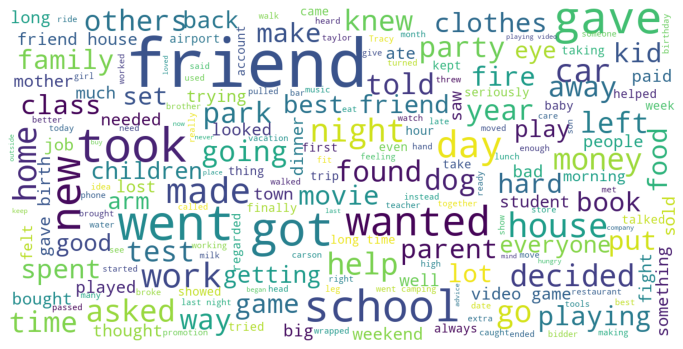

In [36]:
agree_str = " ".join(agreeing_df['Orginal_m'].values)
tagged_sentence = nltk.tag.pos_tag(agree_str.split())
edited_sentence = [word for word,tag in tagged_sentence if filter_tag(tag)]
edited_sentence = ' '.join(edited_sentence)
print(edited_sentence)

show_wordcloud(edited_sentence)

walked homeless woman asking change did not have money they give her. felt bad afterwards. was charge taking food camping trip left food home. opened their mouth speak came shocked everyone. was excited wake attend school. taught art elementary schools was really great his students. led their army fought hard war they sat throne. watched baseball his friends working hard week his job. kai was bored had nothing do so he played card games. changed clean clothes, they go big play. jan took them they experience city first time. returned house previously storming huge fight. didn't know why she was having bad luck found answer. was talking group friends. talked back fit in. kept baby up night watch concussion. shut eyes fact he didn't want her see sex scene movie. was taking test found it difficult first. was grading research paper. felt satisfied work. gave you Skylar account netflix, so you wouldn't have pay your own account. was phone while national park. They lent little attention view.

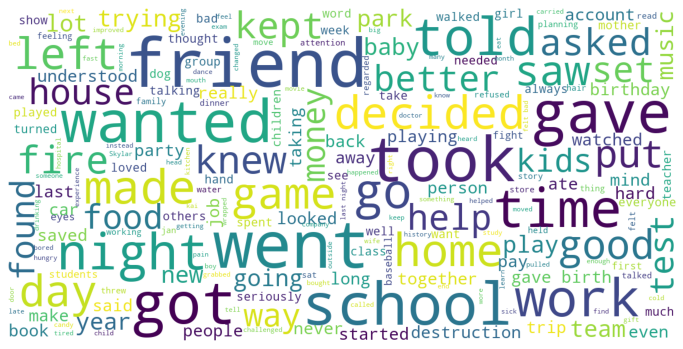

In [37]:
diagree_str = " ".join(disagreeing_df['Orginal_m'].values)
tagged_sentence = nltk.tag.pos_tag(diagree_str.split())
edited_sentence = [word for word,tag in tagged_sentence if filter_tag(tag)]
edited_sentence = ' '.join(edited_sentence)
print(edited_sentence)

show_wordcloud(edited_sentence)

### Sentiment Analysis of Disagreeing paraphrases

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [13]:
sent_scores_m = []
sent_scores_f = []
sent_scores_o = []
for i, row in m_f_join.iterrows():
    sent_scores_m.append(sia.polarity_scores(row['Paraphrases_m'])['compound'])
    sent_scores_f.append(sia.polarity_scores(row['Paraphrases_f'])['compound'])
    sent_scores_o.append(sia.polarity_scores(row['Orginal_m'])['compound'])
    

In [14]:
sent_df = pd.DataFrame({'sent_m':sent_scores_m, 'sent_f': sent_scores_f, 'sent_o': sent_scores_o})

In [15]:
# m_f_join = m_f_join.join(sent_df)
m_f_join['value_f'] = m_f_join['value_f'].astype(float)
m_f_join['value_m'] = m_f_join['value_m'].astype(float)
m_f_join['sent_m'] = m_f_join['sent_m'].astype(float)
m_f_join['sent_f'] = m_f_join['sent_f'].astype(float)

m_f_join

KeyError: 'sent_m'

In [ ]:
m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] < m_f_join["sent_f"])]

,Paraphrases_m,Paraphrases_f,Orginal_m,value_m,value_f,sent_m,sent_f,sent_o
6,"Kendall's pooch was packing some extra pounds,...",Kendall's adorable pup was a bit on the heavie...,Kendall's dog was overweight so they walked it...,2.049710,9.271457,0.0000,0.7579,-0.3612
7,Kendall just scored a sick new ride and can't ...,Kendall is so psyched about her brand new spor...,Kendall got a new sports car and could not wai...,-8.931388,16.900642,-0.7121,-0.2235,0.4767
8,Riley wrapped his arms with a blanket to stay ...,Riley draped her arms with a soft blanket to k...,Riley layered down their arms with a blanket t...,3.963880,9.411061,0.0000,0.2263,0.2263
9,Austin had a close relationship with Quinn and...,Austin and Quinn were romantically involved an...,Austin knew Quinn intimately and they slept to...,-4.986998,-2.417663,0.3400,0.5267,0.0000
10,Carson pecked Alex lightly on the cheek and in...,Carson softly kissed Alex on the cheek and ask...,Carson kissed Alex gently on the cheek and ask...,6.097438,16.207578,0.4019,0.7506,0.6808
...,...,...,...,...,...,...,...,...
1945,Austin served as an intern and therefore he co...,"As a dedicated intern, Austin fulfilled his re...",Austin was an intern and so he worked without ...,-4.832505,18.285987,0.0000,0.7003,0.0762
1947,Kendall was keeping an eye on his buddy's furr...,Kendall was taking care of her friend's adorab...,Kendall was watching a friend's dog. Kendall d...,-0.912279,16.772616,0.4939,0.6369,0.0000
1948,Kendall expertly parallel parked to prove his ...,Kendall carefully parallel parked to demonstra...,Kendall parallel parked so they could pass the...,-18.584929,2.670823,0.0000,0.5994,0.0000
1949,Bailey single-handedly took out the enemy's he...,"With determination and strategic thinking, Bai...",Bailey destroyed the enemy's bunker and won th...,-4.667017,5.791152,-0.5994,0.2732,-0.5267


In [16]:
m_f_join = pd.read_csv("male_female_par_scores.csv")

In [82]:
print("Samples where M<F (agreement) and Sentiment M < Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] < m_f_join["sent_f"])]))
print("Samples where M<F (agreement) and Sentiment M > Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] > m_f_join["sent_f"])]))
print("Samples where M>F (disagreement) and Sentiment M < Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"]) & (m_f_join["sent_m"] < m_f_join["sent_f"])]))
print("Samples where M>F (disagreement) and Sentiment M > Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"]) & (m_f_join["sent_m"] > m_f_join["sent_f"])]))

Samples where M<F (agreement) and Sentiment M < Sentiment F:  730
Samples where M<F (agreement) and Sentiment M > Sentiment F:  374
Samples where M>F (disagreement) and Sentiment M < Sentiment F:  372
Samples where M>F (disagreement) and Sentiment M > Sentiment F:  281


In [19]:
print("Samples where M<F (agreement) and Sentiment M < Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] <= m_f_join["sent_f"])]))
print("Samples where M<F (agreement) and Sentiment M > Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] < m_f_join["value_f"]) & (m_f_join["sent_m"] > m_f_join["sent_f"])]))
print("Samples where M>F (disagreement) and Sentiment M < Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"]) & (m_f_join["sent_m"] <= m_f_join["sent_f"])]))
print("Samples where M>F (disagreement) and Sentiment M > Sentiment F: ", len(m_f_join.loc[(m_f_join["value_m"] > m_f_join["value_f"]) & (m_f_join["sent_m"] > m_f_join["sent_f"])]))

Samples where M<F (agreement) and Sentiment M < Sentiment F:  859
Samples where M<F (agreement) and Sentiment M > Sentiment F:  374
Samples where M>F (disagreement) and Sentiment M < Sentiment F:  437
Samples where M>F (disagreement) and Sentiment M > Sentiment F:  281


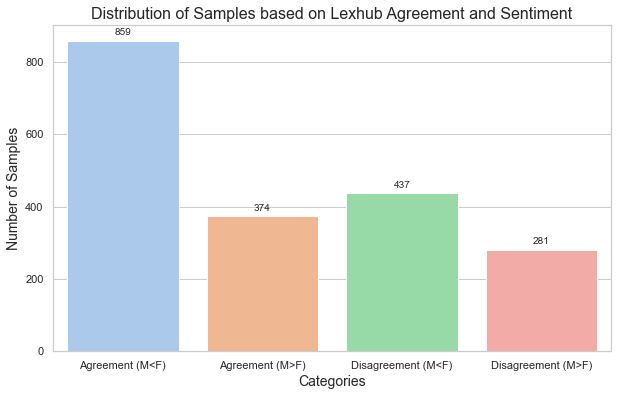

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
categories = ['Agreement (M<F)', 'Agreement (M>F)', 'Disagreement (M<F)', 'Disagreement (M>F)']
values = [859, 374, 437, 281]

# Create a DataFrame
data = {'Categories': categories, 'Values': values}
df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(20, 12))
plot = sns.barplot(x='Categories', y='Values', data=df, palette="pastel")

# Adding values on top of the bars
for index, value in enumerate(values):
    plot.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Samples based on Lexhub Agreement and Sentiment', fontsize=16)

# Show the plot
plt.show()

In [85]:
m_f_join.to_csv("male_female_par_scores.csv")